In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## CARTAS

### Parámetros relevantes

- **dbfId**: El identificador de la carta que se usará para identificar su uso en los mazos.
- **playerClass**: La clase a la que corresponde la carta (puede ser neutral o cualquiera de las 9 clases disponibles).
- **race**: Raza del esbirro (ej: 'ELEMENTAL', 'MECH', 'MURLOC').
- **rarity**: Rareza de la carta: ['FREE','COMMON','RARE','EPIC','LEGENDARY']



In [2]:
#Leemos el JSON de las cartas
df_cards = pd.read_json("Data/cards.json")

In [3]:
#Eliminamos los parámetros no relevantes
df_cards.drop('artist', axis=1, inplace=True) #Nombre del artista
df_cards.drop('flavor', axis=1, inplace=True) #Descripción de la carta en la colección
df_cards.drop('referencedTags', axis=1, inplace=True) #Etiquetas referenciales
df_cards.drop('elite', axis=1, inplace=True) #Bandera que indica si son cartas élite o no (todas las marcadas son legendarias)
df_cards.drop('id', axis=1, inplace=True) #Id por set (no se usa en los mazos)
df_cards.drop('hideStats', axis=1, inplace=True) #Bandera que define si se muestra la salud y el ataque
df_cards.drop('howToEarn', axis=1, inplace=True) #Descripción de cómo ganar una a dos copias de la carta
df_cards.drop('howToEarnGolden', axis=1, inplace=True) #Descripción de cómo ganar una a dos copias de la carta en dorado
df_cards.drop('faction', axis=1, inplace=True) #¿El personaje simpatiza con la Alianza o la Horda?
df_cards.drop('targetingArrowText', axis=1, inplace=True) #Texto que aparece cuando se va a seleccionar un objetivo
df_cards.drop('overload', axis=1, inplace=True) #Sobrecarga (cristales de maná bloquedos para el siguiente turno. Se sobreen-
                                                #tiende en el texto)
df_cards.drop('collectionText', axis=1, inplace=True) #Texto alternativo
df_cards.drop('playRequirements', axis=1, inplace=True) #Requisitos para jugar la carta
df_cards.drop('classes', axis=1, inplace=True) #Caso para las cartas tri-clase
df_cards.drop('multiClassGroup', axis=1, inplace=True) #Caso para las cartas tri-clase
df_cards.drop('entourage', axis=1, inplace=True)
#df_cards.drop('collectible', axis=1, inplace=True) #Bandera que define si la carta es coleccionable. Se sobreentiende
df_cards.drop('attack', axis=1, inplace=True) #
df_cards.drop('health', axis=1, inplace=True) #
df_cards.drop('durability', axis=1, inplace=True) #
df_cards.drop('spellDamage', axis=1, inplace=True) #
df_cards.drop('text', axis=1, inplace=True) #

df_cards.rename(columns={'dbfId':'id'}, inplace=True)
df_cards['id'].fillna(0, inplace=True) #Eliminar después
df_cards['id'] = df_cards['id'].astype(int)
df_cards['cost'].fillna(0, inplace=True)
df_cards['cost'] = df_cards['cost'].astype(int)
df_cards['collectible'].fillna(False, inplace=True)
df_cards['collectible'] = df_cards['collectible'].astype(bool)

#Actualizamos el índice de cada registro
df_cards.index = np.arange(0, len(df_cards))
#Eliminamos los parámetros que tienen pocos valores, a excepción de algunos muy relevantes
print(df_cards.info())
df_cards.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 0 to 3116
Data columns (total 11 columns):
cardClass      3114 non-null object
collectible    3117 non-null bool
cost           3117 non-null int32
id             3117 non-null int32
mechanics      1061 non-null object
name           3116 non-null object
playerClass    3114 non-null object
race           435 non-null object
rarity         1598 non-null object
set            3116 non-null object
type           3116 non-null object
dtypes: bool(1), int32(2), object(8)
memory usage: 246.6+ KB
None


,cardClass,collectible,cost,id,mechanics,name,playerClass,race,rarity,set,type
0,NEUTRAL,True,4,2518,NaN,Crowd Favorite,NEUTRAL,NaN,EPIC,TGT,MINION
1,NEUTRAL,False,6,1769,NaN,Ben Thompson,NEUTRAL,NaN,LEGENDARY,CREDITS,MINION
2,NEUTRAL,False,0,10081,NaN,Deviate Switch,NEUTRAL,NaN,NaN,TB,ENCHANTMENT
3,WARRIOR,True,3,40569,[BATTLECRY],Grimestreet Pawnbroker,WARRIOR,NaN,RARE,GANGS,MINION
4,NEUTRAL,True,4,1370,NaN,Oasis Snapjaw,NEUTRAL,BEAST,FREE,CORE,MINION


## MAZOS

### Parámetros relevantes

In [4]:
#Leemos el CSV de las mazos
df_decks = pd.read_csv('Data/decks.csv')

In [5]:
#Sólo nos interesan los mazos de formato normal (sólo Estándar y Salvaje)
df_decks = df_decks[(df_decks.deck_type == 'Ranked Deck') | (df_decks.deck_type == 'Tournament')]
df_decks = df_decks[df_decks.deck_format == 'S']

In [6]:
#Eliminamos los parámetros no relevantes
df_decks.drop('deck_type', axis=1, inplace=True) #Tipo de mazo. Todos son mazos competitivos
df_decks.drop('deck_format', axis=1, inplace=True) #Tipo de formato de juego. Todos son mazos estándar
df_decks.drop('deck_id', axis=1, inplace=True) #Id del mazo. No es relevante
df_decks.drop('date', axis=1, inplace=True) #Fecha de subida del mazo. No es relevante.
df_decks.drop('user', axis=1, inplace=True) #Usuario del mazo
#df_decks.drop('title', axis=1, inplace=True) #Nombre del mazo del mazo
df_decks.drop('rating', axis=1, inplace=True) #Puntuación del mazo

#Actualizamos el índice de cada registro
df_decks.index = np.arange(0, len(df_decks))

print(df_decks.info())
df_decks.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103891 entries, 0 to 103890
Data columns (total 35 columns):
craft_cost        103891 non-null int64
deck_archetype    103891 non-null object
deck_class        103891 non-null object
deck_set          103891 non-null object
title             103890 non-null object
card_0            103891 non-null int64
card_1            103891 non-null int64
card_2            103891 non-null int64
card_3            103891 non-null int64
card_4            103891 non-null int64
card_5            103891 non-null int64
card_6            103891 non-null int64
card_7            103891 non-null int64
card_8            103891 non-null int64
card_9            103891 non-null int64
card_10           103891 non-null int64
card_11           103891 non-null int64
card_12           103891 non-null int64
card_13           103891 non-null int64
card_14           103891 non-null int64
card_15           103891 non-null int64
card_16           103891 non-null int64
card_

,craft_cost,deck_archetype,deck_class,deck_set,title,card_0,card_1,card_2,card_3,card_4,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,0,Unknown,Mage,Explorers,Beginners Spelldamage Mage,77,77,90,90,175,...,662,662,672,672,906,906,1004,1004,1084,1084
1,5180,Unknown,Rogue,Explorers,Weazelbuster's Storm Rogue (Standard),180,180,365,365,459,...,1029,1064,1117,1117,1158,1158,268,556,2884,2884
2,6260,Unknown,Druid,Explorers,Ramp Druid,64,64,95,137,137,...,2598,2598,2736,2782,2782,2919,38113,38113,38319,38319
3,7980,Fatigue Mage,Mage,Explorers,K-DOG's Malygos Fatigue Mage: Wrecker of Contr...,138,138,172,172,395,...,1016,2262,2874,2875,2901,2901,2949,36111,39225,39840
4,1480,Mill Rogue,Rogue,Explorers,Mill Rogue Revived! (K-DOG),180,180,196,196,365,...,2291,2304,2304,2704,2883,2949,2951,38578,39313,39491


In [7]:
#Hay algunas cartas cuyo nombre coincide con algunas cartas de aventuras, que accidentalmente heredaron el ID de las no coleccio-
#nales, por lo que debemos buscarlas y reemplazarlas con sus verdaderos IDs

def replace_ambiguities():
    print('Processing',len(df_decks))
    for i in range(1000):
    #for i in range(len(df_decks)):
        deckRow = (df_decks.iloc[[i]].values.tolist())[0]
        #print(deckRow)
        #if i % 1000 == 0:
            #print('Indexing', i)
        for h in range(30):
            cardRow = (df_cards[df_cards.id == deckRow[h+5]].values.tolist())[0][1:6]
            if cardRow[0] != True:
                print('In', i+1,'we found',cardRow)
                listCoincidence = (df_cards[(df_cards.name == cardRow[4]) & (df_cards.collectible == True)].values.tolist())[0][3]
                #Reemplazar en todo el dataframe
                for k in range(30):
                    column = 'card_' + str(k)
                    df_decks[column] = df_decks[column].replace(cardRow[2], listCoincidence)
                deckRow = (df_decks.iloc[[i]].values.tolist())[0]
                print('Coincidence with',listCoincidence)

%time replace_ambiguities()

Processing 103891
In 3 we found [False, 0, 137, nan, 'Wrath']
Coincidence with 836
In 3 we found [False, 0, 38113, nan, 'Raven Idol']
Coincidence with 13335
In 3 we found [False, 5, 38319, ['CHARGE', 'TAUNT'], 'Druid of the Claw']
Coincidence with 692
In 8 we found [False, 10, 41609, ['TAUNT', 'InvisibleDeathrattle'], 'Nefarian']
Coincidence with 2261
In 13 we found [False, 0, 1161, nan, 'Starfall']
Coincidence with 86
In 58 we found [False, 1, 40402, nan, 'Evolve']
Coincidence with 38266
In 79 we found [False, 0, 468, nan, 'Mark of Nature']
Coincidence with 151
In 195 we found [False, 3, 2310, nan, 'Druid of the Flame']
Coincidence with 2292
In 259 we found [False, 0, 38653, nan, 'Wisp']
Coincidence with 179
In 481 we found [False, 0, 40341, nan, 'Cleave']
Coincidence with 940
Wall time: 16 s


In [8]:
#Archeotypes generalization and filter
df_decks['deck_archetype'] = df_decks['deck_archetype'].str.replace(r"Druid|Hunter|Mage|Paladin|Priest|Rogue|Shaman|Warrior|Warlock|Pally|adin|lock|Worgen", "").str.strip()
df_decks['deck_archetype'].value_counts()

Unknown          23274
Control           9751
Midrange          8277
Reno              7929
N'Zoth            6220
Dragon            5423
C'Thun            4008
Tempo             3710
Aggro             3451
Jade Lotus        3213
Miracle           2899
Ramp              2844
Yogg              2507
Zoo               2337
Pirate            1843
Murloc            1653
Beast             1514
Secrets           1486
Freeze            1375
Malygos           1229
Discard           1148
Hand               895
Patron             742
Fatigue            686
Resurrect          653
Secret             644
Mill               598
Token              578
Face               561
Totem              514
Demon              453
OTK                447
Shadow             439
Maly               170
Astral             155
Mur                 86
Silence             77
Randuin Wrynn       46
Edit                23
Water               23
Oil                  6
Mech                 4
Name: deck_archetype, dtype: int64

In [9]:
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Reno','Control').replace('Demon','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Dragon','Control').replace('Water','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Miracle','Combo').replace('OTK','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Ramp','Tempo').replace('Oil','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Yogg','Tempo').replace('Maly','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Zoo','Token').replace('Astral','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Pirate','Aggro').replace('Mur','Aggro')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Murloc','Token').replace('Silence','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Beast','Midrange').replace('Randuin Wrynn','Combo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Secrets','Tempo').replace('Totem','Token')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Freeze','Tempo').replace('Jade Lotus','Midrange')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Malygos','Combo').replace('Shadow','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Discard','Midrange').replace('Edit','Unknown')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Hand','Control').replace('Mech','Tempo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Fatigue','Control').replace('Mech','Tempo')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Resurrect','Control').replace('N\'Zoth','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Secret','Tempo').replace('C\'Thun','Control')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Mill','Tempo').replace('Token','Midrange')
df_decks['deck_archetype'] = df_decks['deck_archetype'].replace('Face','Aggro').replace('Patron','Control')
df_decks.drop('title', axis=1, inplace=True)

df_decks.head()
df_decks['deck_archetype'].value_counts()

Control     37354
Unknown     23297
Midrange    19234
Tempo       13168
Aggro        5941
Combo        4897
Name: deck_archetype, dtype: int64

In [10]:
#Esto se hace al final
#Sólo nos interesan las cartas jugables (no las que aparecen en los créditos o las disponibles sólo en modo aventura)
df_cards = df_cards[df_cards.collectible == True]
df_cards.drop('collectible', axis=1, inplace=True) #Bandera que define si la carta es coleccionable. Se sobreentiende

In [11]:
df_cards.head()

,cardClass,cost,id,mechanics,name,playerClass,race,rarity,set,type
0,NEUTRAL,4,2518,NaN,Crowd Favorite,NEUTRAL,NaN,EPIC,TGT,MINION
3,WARRIOR,3,40569,[BATTLECRY],Grimestreet Pawnbroker,WARRIOR,NaN,RARE,GANGS,MINION
4,NEUTRAL,4,1370,NaN,Oasis Snapjaw,NEUTRAL,BEAST,FREE,CORE,MINION
9,PRIEST,3,1363,NaN,Shadow Word: Death,PRIEST,NaN,FREE,CORE,SPELL
10,NEUTRAL,3,2579,"[DIVINE_SHIELD, STEALTH]",Silent Knight,NEUTRAL,NaN,COMMON,TGT,MINION


In [12]:
df_decks.head()

,craft_cost,deck_archetype,deck_class,deck_set,card_0,card_1,card_2,card_3,card_4,card_5,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,0,Unknown,Mage,Explorers,77,77,90,90,175,175,...,662,662,672,672,906,906,1004,1004,1084,1084
1,5180,Unknown,Rogue,Explorers,180,180,365,365,459,459,...,1029,1064,1117,1117,1158,1158,268,556,2884,2884
2,6260,Unknown,Druid,Explorers,64,64,95,836,836,254,...,2598,2598,2736,2782,2782,2919,13335,13335,692,692
3,7980,Control,Mage,Explorers,138,138,172,172,395,395,...,1016,2262,2874,2875,2901,2901,2949,36111,39225,39840
4,1480,Tempo,Rogue,Explorers,180,180,196,196,365,365,...,2291,2304,2304,2704,2883,2949,2951,38578,39313,39491


In [13]:
#Copying the dataframes as a checkpoint
df2_cards = df_cards.copy()
df2_decks = (df_decks.copy())[0:1000]
#df2_decks = df_decks.copy()

In [14]:
def statics_deck(test):
    minion, spell, weapon, hero, avgDeck = 0,0,0,0,0
    #print(test)
    for h in range(30):
        #print(test[h+4])
        cardRow = (df2_cards[df2_cards.id == test[h+4]].values.tolist())[0]
        #print(cardRow)
        avgDeck += cardRow[1]
        if cardRow[9] == 'MINION':
            minion += 1
        elif cardRow[9] == 'SPELL':
            spell += 1
        elif cardRow[9] == 'WEAPON':
            weapon += 1
        elif cardRow[9] == 'HERO':
            hero += 1
    avgDeck = float(avgDeck)
    avgDeck /= 30
    return minion, spell, weapon, hero, avgDeck

In [15]:
arrM, arrS, arrW, arrH, arrAvg = [],[],[],[],[]

def general_statics():
    for i in range(1000):
    #for i in range(len(df2_decks)):
        #if i % 500 == 0:
        #    print('Indexing',i)
        #Set as integer
        prueba = (df2_decks.iloc[[i]].values.tolist())[0]
        #print(prueba)
        prueba[0] = int(prueba[0])
        for j in range(30):
            prueba[j+4] = int(prueba[j+4])
        contMin, contSpell, contWeap, contHero, avg = statics_deck(prueba)
        #print(contMin, contSpell, contWeap, contHero, avg)
        arrM.append(contMin)
        arrS.append(contSpell)
        arrW.append(contWeap)
        arrH.append(contHero)
        arrAvg.append(avg)

%time general_statics()

Wall time: 14.1 s


In [16]:
#NO TOCAR HASTA PREVIO AVISO

print(len(arrAvg), len(arrM), len(arrS), len(arrW), len(arrH))
df2_decks['avg_mana'] = arrAvg
df2_decks['nminions'] = arrM
df2_decks['nspells'] = arrS
df2_decks['nweapons'] = arrW
df2_decks['nheroes'] = arrH

print(df2_decks.info())
df2_decks.head()

1000 1000 1000 1000 1000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
craft_cost        1000 non-null int64
deck_archetype    1000 non-null object
deck_class        1000 non-null object
deck_set          1000 non-null object
card_0            1000 non-null int64
card_1            1000 non-null int64
card_2            1000 non-null int64
card_3            1000 non-null int64
card_4            1000 non-null int64
card_5            1000 non-null int64
card_6            1000 non-null int64
card_7            1000 non-null int64
card_8            1000 non-null int64
card_9            1000 non-null int64
card_10           1000 non-null int64
card_11           1000 non-null int64
card_12           1000 non-null int64
card_13           1000 non-null int64
card_14           1000 non-null int64
card_15           1000 non-null int64
card_16           1000 non-null int64
card_17           1000 non-null int64
card_18           1000 non-nul

,craft_cost,deck_archetype,deck_class,deck_set,card_0,card_1,card_2,card_3,card_4,card_5,...,card_25,card_26,card_27,card_28,card_29,avg_mana,nminions,nspells,nweapons,nheroes
0,0,Unknown,Mage,Explorers,77,77,90,90,175,175,...,906,1004,1004,1084,1084,3.066667,12,18,0,0
1,5180,Unknown,Rogue,Explorers,180,180,365,365,459,459,...,1158,268,556,2884,2884,2.600000,12,18,0,0
2,6260,Unknown,Druid,Explorers,64,64,95,836,836,254,...,2919,13335,13335,692,692,3.900000,18,12,0,0
3,7980,Control,Mage,Explorers,138,138,172,172,395,395,...,2901,2949,36111,39225,39840,3.733333,15,15,0,0
4,1480,Tempo,Rogue,Explorers,180,180,196,196,365,365,...,2949,2951,38578,39313,39491,2.600000,12,18,0,0


In [17]:
#Checkpoint approved
df_cards = df2_cards.copy()
df_decks = df2_decks.copy()
#2nd. Checkpoint

### Discretización

In [18]:
#Ya no necesitamos los id de las cartas
for i in range(30):
    df_decks.drop(df_decks.columns[4], axis=1, inplace=True)
df_decks.drop("deck_set", axis=1, inplace=True)
df_decks.drop("nheroes", axis=1, inplace=True) #En 2016 no existían cartas héroe

df_decks = df_decks[['deck_class','craft_cost','avg_mana','nminions','nspells','nweapons','deck_archetype']]

In [19]:
#Haremos un diccionario con las clases
colec_classes = df_decks[['deck_class']].drop_duplicates().sort_values('deck_class')
colec_classes.index = np.arange(0, 9)

colec_classes

,deck_class
0,Druid
1,Hunter
2,Mage
3,Paladin
4,Priest
5,Rogue
6,Shaman
7,Warlock
8,Warrior


In [20]:
cat_dict_classes = colec_classes.to_dict()
cat_dict_combined = colec_classes.to_dict()

cat_dict_classes

{'deck_class': {0: 'Druid',
  1: 'Hunter',
  2: 'Mage',
  3: 'Paladin',
  4: 'Priest',
  5: 'Rogue',
  6: 'Shaman',
  7: 'Warlock',
  8: 'Warrior'}}

In [21]:
def transform_categories(df, cat_dict, banned):
    #Transformando las clases en categorías
    for n,col in df.items():
        if not pd.api.types.is_numeric_dtype(col) and n != banned:
            # Transforma la variable a tipo category
            df[n] = col.astype('category')

            # Actualiza cat_dict
            cat_dict[n] = {i:e for i,e in enumerate(df[n].cat.categories)}

    for n,col in df.items():
        if pd.api.types.is_categorical_dtype(col):
            df[n] = col.cat.codes
            
transform_categories(df_decks, cat_dict_combined, 'deck_archetype')

In [22]:
df_decks.head(7)
#cat_dict_combined

,deck_class,craft_cost,avg_mana,nminions,nspells,nweapons,deck_archetype
0,2,0,3.066667,12,18,0,Unknown
1,5,5180,2.600000,12,18,0,Unknown
2,0,6260,3.900000,18,12,0,Unknown
3,2,7980,3.733333,15,15,0,Control
4,5,1480,2.600000,12,18,0,Tempo
5,5,8120,2.566667,13,17,0,Combo
6,2,960,2.000000,14,16,0,Unknown


In [23]:
#Ahora, separaremos los etiquetados

willLabel = df_decks[df_decks.deck_archetype == 'Unknown']
df_decks = df_decks[df_decks.deck_archetype != 'Unknown']

print(f'Non-labeled shape: {willLabel.shape}')
print(f'Labeled shape    : {df_decks.shape}')

Non-labeled shape: (314, 7)
Labeled shape    : (686, 7)


In [24]:
#Lo mismo con arqueotipos
colec_archetype = df_decks[['deck_archetype']].drop_duplicates().sort_values('deck_archetype')
colec_archetype.index = np.arange(0, 5)

cat_dict_arch = colec_archetype.to_dict()

cat_dict_arch

{'deck_archetype': {0: 'Aggro',
  1: 'Combo',
  2: 'Control',
  3: 'Midrange',
  4: 'Tempo'}}

In [25]:
transform_categories(df_decks, cat_dict_combined, 'deck_class')
df_decks.head(7)

,deck_class,craft_cost,avg_mana,nminions,nspells,nweapons,deck_archetype
3,2,7980,3.733333,15,15,0,2
4,5,1480,2.600000,12,18,0,4
5,5,8120,2.566667,13,17,0,1
31,6,16220,4.033333,19,10,1,3
55,5,6920,2.633333,15,15,0,1
62,5,4400,3.200000,16,14,0,1
76,6,4040,3.200000,18,11,1,2


### Entrenamiento (Random Forest)

In [26]:
from sklearn.model_selection import train_test_split

x = df_decks.drop('deck_archetype', axis=1)
y = df_decks['deck_archetype']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (548, 6)
Validation shape: (138, 6)


In [27]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=150, n_jobs=-1, oob_score=True, min_samples_split=5)
m.fit(x_train, y_train)

C:\Users\n421\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [28]:
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')
    if hasattr(m, 'oob_score_'): print(f'OOB        = {m.oob_score_:.4}')
    
score()    

Scores:
Train      = 0.9635
Validation = 0.8623
OOB        = 0.8449


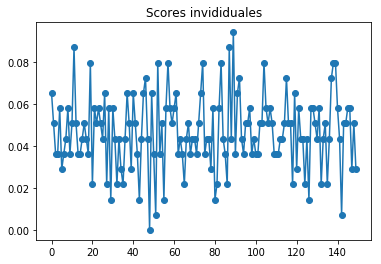

In [29]:
from sklearn.metrics import accuracy_score

preds = np.stack([t.predict(x_val) for t in m.estimators_])
accs = [accuracy_score(y_val==2, p) for p in preds]
plt.plot(accs, '-o')
plt.title('Scores invididuales');

In [30]:
# Usemos los árboles para obtener una predicción con una estimación de confianza.
sample = x_val.sample(1)

pred = np.stack([t.predict(sample) for t in m.estimators_])

pred.mean(), pred.mean() > 0.5, pred.std()

(2.026666666666667, True, 0.30433899228035544)

### Predicción

Fuente: https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/

In [31]:
features = df_decks.columns[:6]

features

Index(['deck_class', 'craft_cost', 'avg_mana', 'nminions', 'nspells',
       'nweapons'],
      dtype='object')

In [32]:
m.predict_proba(x_train[features])[0:10]

array([[0.        , 0.        , 0.89907143, 0.00555556, 0.09537302],
       [0.        , 0.        , 0.97259524, 0.02740476, 0.        ],
       [0.00222222, 0.        , 0.91292063, 0.08019048, 0.00466667],
       [0.00972222, 0.01992593, 0.20449206, 0.71407143, 0.05178836],
       [0.01342857, 0.01303175, 0.89420106, 0.07433862, 0.005     ],
       [0.75314286, 0.00490476, 0.01673016, 0.211     , 0.01422222],
       [0.        , 0.        , 0.99333333, 0.        , 0.00666667],
       [0.00266667, 0.        , 0.98677778, 0.00388889, 0.00666667],
       [0.01222222, 0.00711111, 0.85938384, 0.10887542, 0.01240741],
       [0.00777778, 0.        , 0.23627778, 0.06927778, 0.68666667]])

Ahora trabajaremos con la data no clasificada

In [33]:
willLabel.head(8)

,deck_class,craft_cost,avg_mana,nminions,nspells,nweapons,deck_archetype
0,2,0,3.066667,12,18,0,Unknown
1,5,5180,2.600000,12,18,0,Unknown
2,0,6260,3.900000,18,12,0,Unknown
6,2,960,2.000000,14,16,0,Unknown
7,3,8640,5.000000,25,4,1,Unknown
8,2,7920,3.733333,20,10,0,Unknown
9,3,7520,4.533333,18,10,2,Unknown
10,0,10240,5.066667,22,8,0,Unknown


In [34]:
archetype_predicted = m.predict(willLabel[features])
archetype_predicted[0:10]

array([4, 4, 4, 4, 2, 2, 2, 2, 2, 4], dtype=int8)

In [35]:
m.predict_proba(willLabel[features])[0:10]

array([[0.00666667, 0.00738095, 0.12551587, 0.17254233, 0.68789418],
       [0.01111111, 0.27763492, 0.17056349, 0.06683333, 0.47385714],
       [0.        , 0.        , 0.37922222, 0.12287903, 0.49789875],
       [0.10744444, 0.02900794, 0.12177249, 0.26621693, 0.4755582 ],
       [0.00584127, 0.        , 0.96771429, 0.01977778, 0.00666667],
       [0.00666667, 0.        , 0.6259418 , 0.        , 0.36739153],
       [0.00584127, 0.        , 0.98638095, 0.00222222, 0.00555556],
       [0.        , 0.        , 0.89906878, 0.        , 0.10093122],
       [0.        , 0.01166667, 0.944     , 0.02433333, 0.02      ],
       [0.        , 0.01138889, 0.36355739, 0.03918803, 0.58586569]])

In [40]:
#Reemplazo de etiqueta desconocida por etiqueta de diccionario
willLabel['deck_archetype'] = archetype_predicted
archetype_predicted = willLabel['deck_archetype']
willLabel['deck_archetype'] = willLabel['deck_archetype'].replace(cat_dict_arch['deck_archetype'])

In [41]:
willLabel.head(10)

,deck_class,craft_cost,avg_mana,nminions,nspells,nweapons,deck_archetype
0,2,0,3.066667,12,18,0,Tempo
1,5,5180,2.600000,12,18,0,Tempo
2,0,6260,3.900000,18,12,0,Tempo
6,2,960,2.000000,14,16,0,Tempo
7,3,8640,5.000000,25,4,1,Control
8,2,7920,3.733333,20,10,0,Control
9,3,7520,4.533333,18,10,2,Control
10,0,10240,5.066667,22,8,0,Control
11,4,6580,3.733333,18,12,0,Control
12,0,8020,4.566667,15,15,0,Tempo


[Text(0,0,''),
 Text(0,0,'Aggro'),
 Text(0,0,''),
 Text(0,0,'Combo'),
 Text(0,0,''),
 Text(0,0,'Control'),
 Text(0,0,''),
 Text(0,0,'Midrange'),
 Text(0,0,''),
 Text(0,0,'Tempo')]

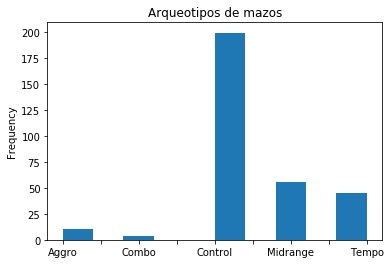

In [45]:
ax = archetype_predicted.plot(title='Arqueotipos de mazos', kind = 'hist')
ax.set_xticklabels(["","Aggro","","Combo","","Control","","Midrange","","Tempo"])